In [1]:
%matplotlib ipympl
from matplotlib import pyplot as plt
import numpy as np
import scipy
from math import pi

# Theis Solution

In [2]:
u = np.logspace(-1,4,1001)
W = scipy.special.exp1(1/u)

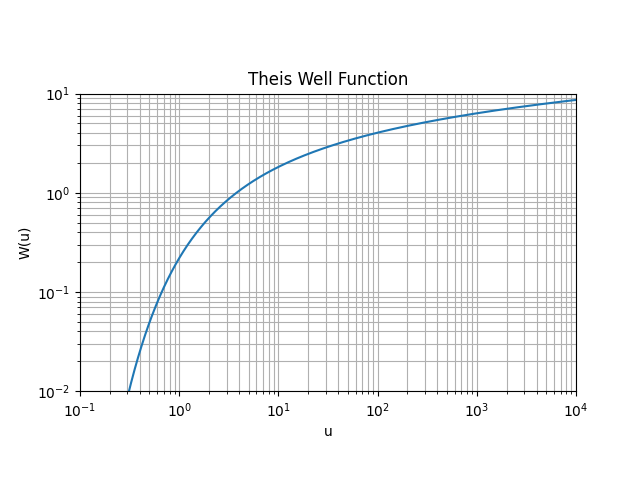

In [3]:
plt.figure(1)
plt.loglog(u,W)
plt.grid(True,which='both')
plt.xlim(.1,10**4)
plt.ylim(10**-2,10)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.xlabel("u")
plt.ylabel("W(u)")
plt.title("Theis Well Function")
plt.show()

In [4]:
def theis(t,r,Q,T,S):
    u = 4*T*t/(r**2 * S)
    return (Q/(4*pi*T))*scipy.special.exp1(1/u)

In [5]:
t=np.array([0.0,1.0,1.5,2.0,2.5,3.0,4.0,5.0,6.0,8.0,10,12,14,18,24,30,40,50,60,80,100,120,150,180,210,240])
s=np.array([0.00, 0.29, 0.38, 0.43,0.48,0.53,0.59,0.65,0.69,0.76,0.81,0.86,0.90,0.96,1.03,1.08,1.15,1.21,1.25,1.32,1.37,1.43,1.49,1.53,1.57,1.6])

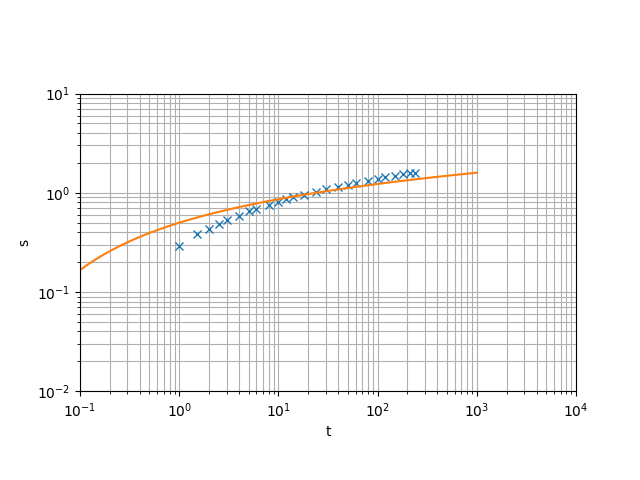

In [6]:
plt.figure(2)
plt.loglog(t,s,'x')
T=100
S=.001
tg = np.logspace(-1,3,1001)
plt.loglog(tg,theis(tg,100,Q=200,T=T,S=S))
plt.grid(True,which='both')
plt.xlim(.1,10**4)
plt.ylim(10**-2,10)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.xlabel("t")
plt.ylabel("s")
plt.show()

In [7]:
from ipywidgets import AppLayout, FloatSlider, FloatLogSlider, VBox

plt.ioff()

Tslider = FloatLogSlider(
    orientation='horizontal',
    description='Transmissivity:',
    value=T,
    base=10,
    min=-2,
    max=3,
    step=.01)

Sslider = FloatLogSlider(
    orientation='horizontal',
    description='Storativity:',
    value=S,
    base=10,
    min=-5,
    max=1.0,
    step=.01
)

fig = plt.figure(3)
plt.title('T={0} S={1}'.format(Tslider.value,Sslider.value))
plt.xlabel("t")
plt.ylabel("s")
plt.loglog(t,s,'x')
plt.xlim(.1,10**4)
plt.ylim(10**-2,10)
ax.set_aspect('equal', adjustable='box')

tg = np.logspace(-1,3,1001)
lines = plt.loglog(tg,theis(tg,100,Q=200,T=Tslider.value,S=Sslider.value))
plt.grid(True,which='both')


def update_lines(change):
    plt.title('T={0} S={1}'.format(Tslider.value,Sslider.value))
    lines[0].set_data(tg, theis(tg,100,Q=200,T=Tslider.value,S=Sslider.value))
    fig.canvas.draw()
    fig.canvas.flush_events()

Tslider.observe(update_lines, names='value')
Sslider.observe(update_lines, names='value')
AppLayout(
    center=fig.canvas,
    footer=VBox([Tslider,Sslider]),
    pane_heights=[0, 6, 1]
)

AppLayout(children=(VBox(children=(FloatLogSlider(value=100.0, description='Transmissivity:', max=3.0, min=-2.…

In [8]:
print("Error from eyeballing T and S", np.sum((s - theis(t,r=100,Q=200,T=Tslider.value,S=Sslider.value))**2)**0.5)

Error from eyeballing T and S 0.10424152679620904


In [9]:
def F(x):
    e = s - theis(t,r=100,Q=200,T=x[0],S=x[1])
    return np.dot(e,e)
X=scipy.optimize.minimize(F,x0=[Tslider.value,Sslider.value],bounds=((10,1000),(1e-8,1e-1)))

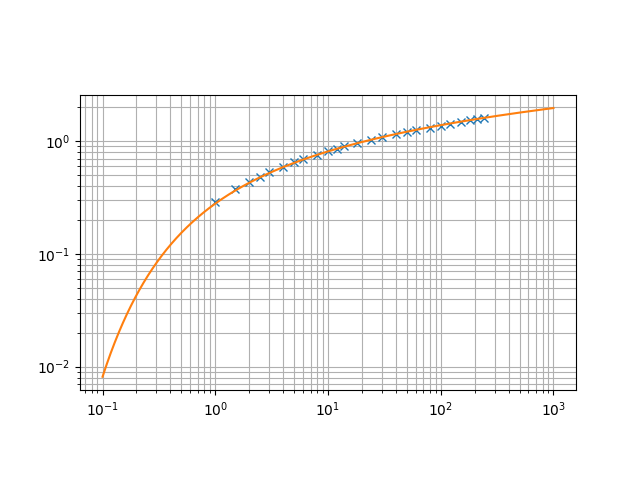

In [10]:
plt.figure(4)
plt.loglog(t,s,'x')
T=65
S=.006
tg = np.logspace(-1,3,1001)
plt.loglog(tg,theis(tg,100,Q=200,T=X.x[0],S=X.x[1]))
plt.grid(True,which='both')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

In [11]:
print("Error after minimizing error with respect to T and S", np.sum((s - theis(t,r=100,Q=200,T=X.x[0],S=X.x[1]))**2)**0.5)

Error after minimizing error with respect to T and S 0.03516291482468921
